# Trabajo Práctico 7 - Punto 3

In [1]:
from IPython.display import IFrame
IFrame("./TP7-Punto3.pdf", width=1000, height=1000)

## Parte A - 3 Inductores y 1 Capacitor
### Simulación circuital de transferencia de tensión en vacío:

#### Circuito simulado con valores calculados analíticamente:

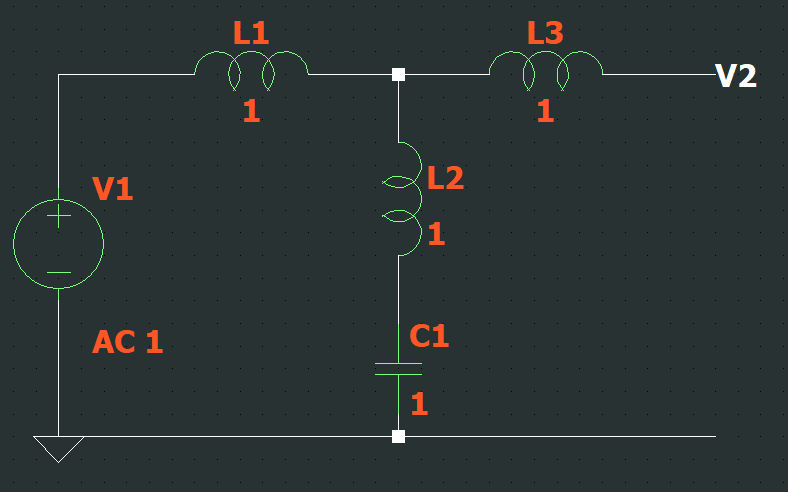

#### Transferencia a con la que se compara:
### $\frac{V_2}{V_1}\big|_{I_2=0} = \frac{S^2+1}{2S^2+1}$

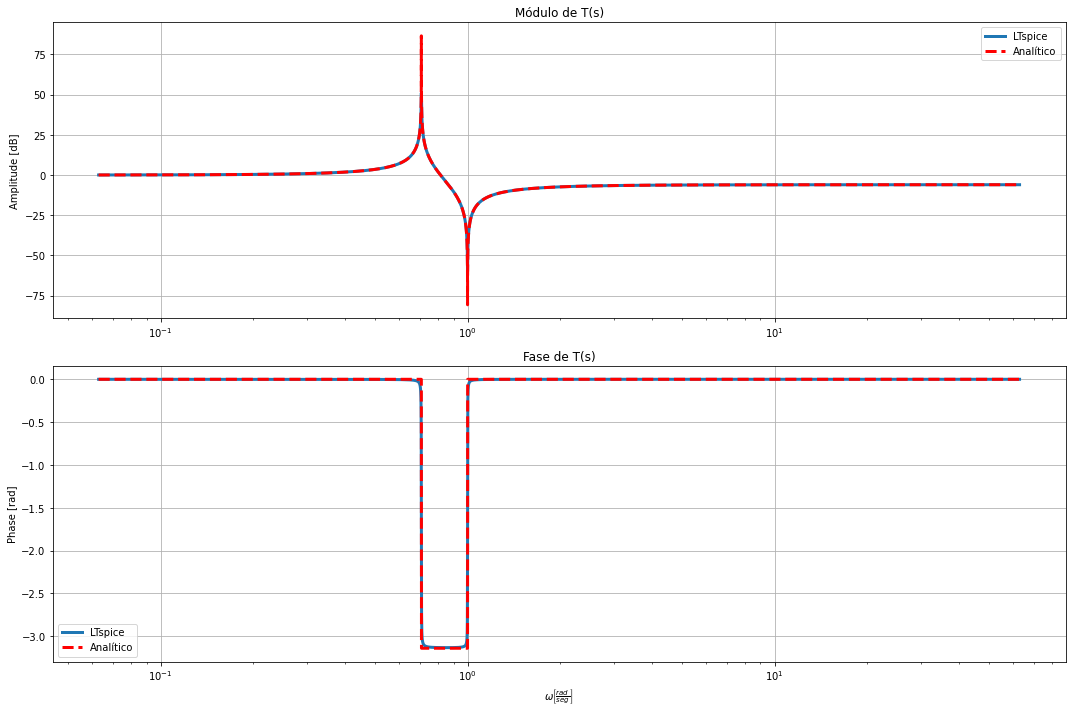

In [5]:
import scipy.signal as sig
import ltspice
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 18})

l = ltspice.Ltspice("./Simulaciones Circuitales/Punto3-A.raw")
l.parse()

#Obtengo curvas de simulación en ltspice
freq = l.get_frequency()
T_ltspice = l.get_data('V(v2)') #(V1=1)

#Comparo con la función de transferencia obtenida analíticamente
num = [1,0,1]
den = [2,0,1]
w, T = sig.freqs(num,den,freq*2*np.pi)

fig, axes = plt.subplots(2, 1, figsize=(15,10))
axes[0].set_title("Módulo de T(s)")
axes[0].semilogx(freq*2*np.pi, 20*np.log10(np.abs(T_ltspice)), linewidth=3.0, label='LTspice')
axes[0].semilogx(w, 20*np.log10(np.abs(T)), 'r--', linewidth=3.0, label='Analítico')

axes[1].set_title("Fase de T(s)")
axes[1].semilogx(freq*2*np.pi, np.angle(T_ltspice), linewidth=3.0, label='LTspice')
axes[1].semilogx(w, np.angle(T), 'r--', linewidth=3.0, label='Analítico')

axes[0].grid()
axes[1].grid()

axes[1].set_xlabel(r'$\omega \left[\frac{rad}{seg}\right]$')

axes[0].set_ylabel("Amplitude [dB]")
axes[1].set_ylabel("Phase [rad]")

axes[0].legend()
axes[1].legend()

plt.tight_layout()

plt.show() 

#### Se observa que la curva analítica y la simulada con LTspice coinciden, por lo que se verifica correctamente que el circuito calculado cumple con la transferencia solicitada.

## Parte B - 3 Capacitores y 1 Inductor
### Simulación circuital de transferencia de tensión en vacío:

#### Circuito simulado con valores calculados analíticamente:

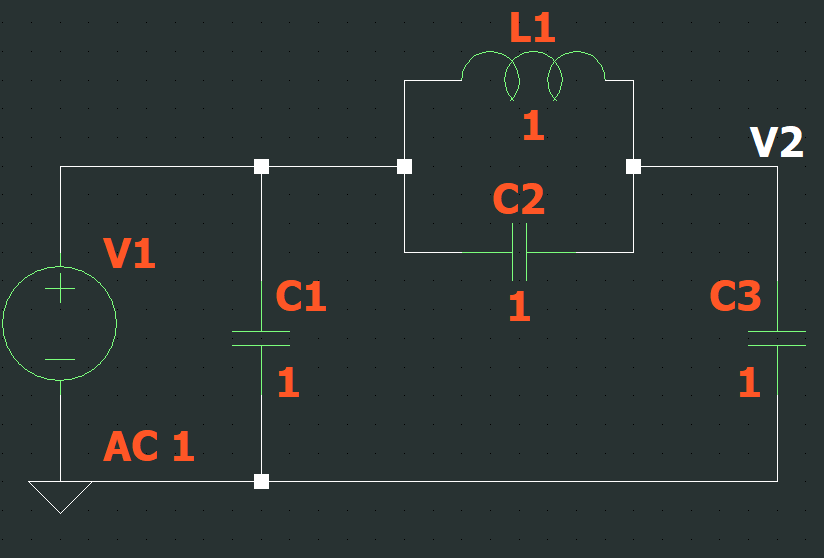

#### Transferencia a con la que se compara:
### $\frac{V_2}{V_1}\big|_{I_2=0} = \frac{S^2+1}{2S^2+1}$

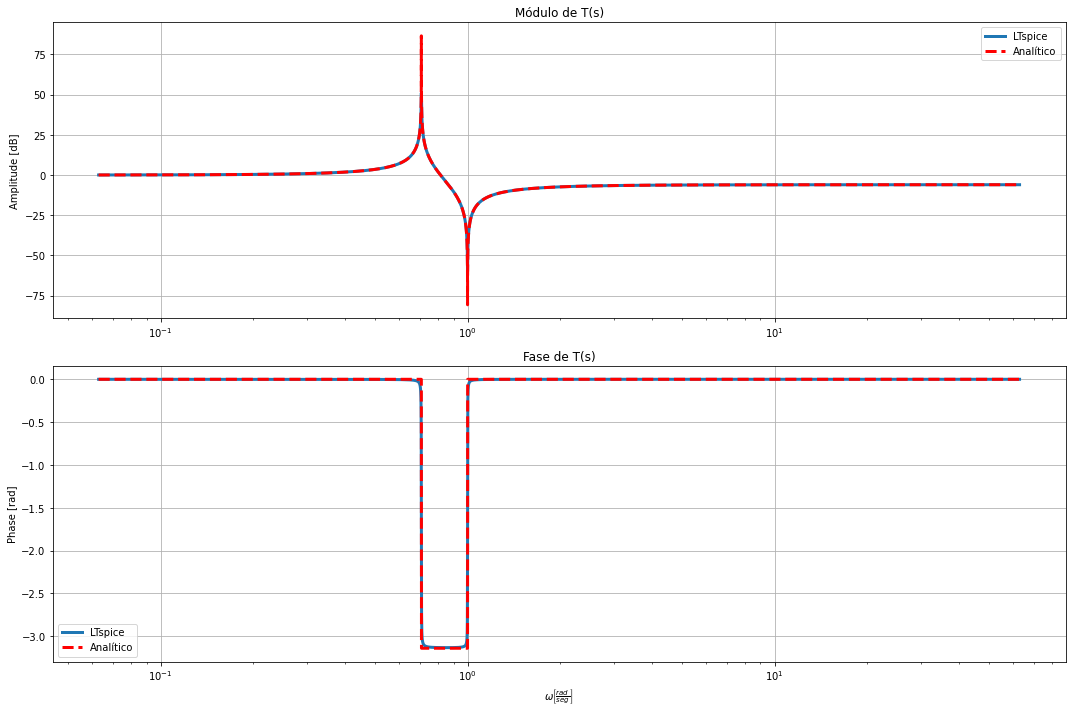

In [6]:
l = ltspice.Ltspice("./Simulaciones Circuitales/Punto3-B.raw")
l.parse()

#Obtengo curvas de simulación en ltspice

freq = l.get_frequency()
T_ltspice = l.get_data('V(v2)') #(V1=1)

#Comparo con la funcion transferencia del enunciado
num = [1,0,1]
den = [2,0,1]

w, T = sig.freqs(num,den,freq*2*np.pi)

fig, axes = plt.subplots(2, 1, figsize=(15,10))

axes[0].set_title("Módulo de T(s)")
axes[0].semilogx(freq*2*np.pi, 20*np.log10(np.abs(T_ltspice)), linewidth=3.0, label='LTspice')
axes[0].semilogx(w, 20*np.log10(np.abs(T)), 'r--', linewidth=3.0, label='Analítico')

axes[1].set_title("Fase de T(s)")
axes[1].semilogx(freq*2*np.pi, np.unwrap(np.angle(T_ltspice)), linewidth=3.0, label='LTspice')
axes[1].semilogx(w, np.unwrap(np.angle(T)), 'r--', linewidth=3.0, label='Analítico')

axes[0].grid()
axes[1].grid()

axes[1].set_xlabel(r'$\omega \left[\frac{rad}{seg}\right]$')

axes[0].set_ylabel("Amplitude [dB]")
axes[1].set_ylabel("Phase [rad]")

axes[0].legend()
axes[1].legend()

plt.tight_layout()

plt.show() 

#### Se observa que la curva analítica y la simulada con LTspice coinciden, por lo que se verifica correctamente que el cuadripolo LC sintetizado cumple con la transferencia solicitada.